# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Cargar los datos
data_path = "../datasets/"

df_instacart_orders = pd.read_csv(data_path+"raw/instacart_orders.csv", sep = ";")
df_products = pd.read_csv(data_path+"raw/products.csv", sep = ";")
df_aisles = pd.read_csv(data_path+"raw/aisles.csv", sep = ";")
df_departments = pd.read_csv(data_path+"raw/departments.csv", sep = ";")
df_order_products = pd.read_csv(data_path+"raw/order_products.csv.zip", sep = ";")

# Visualizar las primeras filas de cada DataFrame
display(df_instacart_orders.head())
display(df_products.head())
display(df_aisles.head())
display(df_departments.head())
display(df_order_products.head())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.00
1,1690866,163593,5,5,12,9.00
2,1454967,39980,4,5,19,2.00
3,1768857,82516,56,0,20,10.00
4,3007858,196724,2,4,12,17.00


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.00,0
1,567889,1560,1.00,1
2,2261212,26683,1.00,1
3,491251,8670,35.00,1
4,2571142,1940,5.00,1


## Conclusiones

Los datos se han cargado correctamente. Sin embargo, parece que los archivos CSV están delimitados por punto y coma en lugar de comas. Vamos a recargar los datos especificando el delimitador correcto.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

In [2]:
print(df_instacart_orders.info())
print(df_products.info())
print(df_aisles.info())
print(df_departments.info())
print(df_order_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory u

## Plan de solución

1. **Valores Nulos:**
   - En el DataFrame `orders`, la columna `days_since_prior_order` tiene 28,819 valores nulos, que fueron rellenados con la mediana.
   - En el DataFrame `products`, la columna `product_name` tiene 1,258 valores nulos, que debemos manejar.
2. **Formatos de Datos:** Todos los formatos parecen correctos según los tipos de datos esperados.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [3]:
# Revisa si hay pedidos duplicados
# Verificar valores nulos en cada DataFrame
print("df_instacart_orders tiene", df_instacart_orders.duplicated().sum(), "duplicados")

df_instacart_orders tiene 15 duplicados


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [4]:
# Mostrar los valores duplicados
print(df_instacart_orders[df_instacart_orders.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Qué sugiere este resultado?

**Limpia los duplicados**

In [5]:
# drop duplicates
df_instacart_orders.drop_duplicates(inplace=True)

# Vuelve a verificar si hay filas duplicadas
assert df_instacart_orders.duplicated().sum() == 0, "Hay filas duplicadas"

Describe brevemente tus hallazgos y lo que hiciste con ellos

### `products` data frame

In [6]:
# Verifica si hay filas totalmente duplicadas
print("df_products tiene", df_products.duplicated().sum(), "duplicados")


# Verifica si hay filas totalmente duplicadas
assert df_products.duplicated().sum() == 0, "Hay filas duplicadas"

df_products tiene 0 duplicados


In [7]:
# Verifica si hay IDs duplicadas de productos
print("df_products tiene", df_products["product_id"].duplicated().sum(), "IDs duplicados")

df_products tiene 0 IDs duplicados


In [8]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print("df_products tiene", df_products["product_name"].str.upper().duplicated().sum(), "nombres duplicados")

df_products tiene 1361 nombres duplicados


In [9]:
# Revisa si hay nombres duplicados de productos no faltantes
print("df_products tiene", df_products["product_name"].duplicated().notna().sum(), "nombres duplicados no faltantes")

df_products tiene 49694 nombres duplicados no faltantes


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `departments` data frame

In [10]:
# Revisa si hay filas totalmente duplicadas
print("df_departments tiene", df_aisles.duplicated().sum(), "duplicados")

df_departments tiene 0 duplicados


In [11]:
# Revisa si hay IDs duplicadas de productos
print("df_departments tiene", df_departments["department_id"].duplicated().sum(), "IDs duplicados")

df_departments tiene 0 IDs duplicados


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `aisles` data frame

In [12]:
# Revisa si hay filas totalmente duplicadas
print("df_aisles tiene", df_aisles.duplicated().sum(), "duplicados")

df_aisles tiene 0 duplicados


In [13]:
# Revisa si hay IDs duplicadas de el aisle
print("df_aisles tiene", df_aisles["aisle_id"].duplicated().sum(), "IDs duplicados")

df_aisles tiene 0 IDs duplicados


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [14]:
# Revisa si hay filas totalmente duplicadas
print("df_order_products tiene", df_order_products.duplicated().sum(), "duplicados")

# Vuelve a verificar si hay cualquier otro duplicado engañoso
assert df_order_products.duplicated().sum() == 0, "Hay filas duplicadas"

df_order_products tiene 0 duplicados


No hay duplicados en los datos

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [15]:
# Selecciona los valores ausentes en la columna 'product_name'
mask = df_products["product_name"].isna()
df_products[mask]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

In [16]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_products[mask]["aisle_id"].unique()


array([100], dtype=int64)

Todos los ausentes estan en el pasillo 100

Describe brevemente cuáles son tus hallazgos.

In [17]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_products[mask]["department_id"].unique()

array([21], dtype=int64)

Todos los valores ausentes estan en el departamento 21

Describe brevemente cuáles son tus hallazgos.

In [18]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_aisles[df_aisles["aisle_id"] == 100])
print(df_departments[df_departments["department_id"] == 21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Esto muestra que el pasillo 100 y departamento 21 podrian ser comodines para productos sin nombre.

In [19]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products["product_name"].fillna("Unknown", inplace=True)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `df_order_products` data frame

In [20]:
# Encuentra los valores ausentes
print(df_order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [21]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
# Verificar si todos los valores ausentes corresponden al primer pedido del cliente
df_instacart_orders[df_instacart_orders["days_since_prior_order"].isna() & df_instacart_orders["order_number"] != 1][["order_number", "days_since_prior_order"]]


,order_number,days_since_prior_order
0,11,30.00
1,5,9.00
2,4,2.00
3,56,10.00
4,2,17.00
...,...,...
478962,5,7.00
478963,2,6.00
478964,16,6.00
478965,3,8.00


No todos los NAs de days_since_prior_order corresponden al primer pedido del cliente. Por lo tanto, no se pueden completar con 0.

### `order_products` data frame

In [22]:
# Encuentra los valores ausentes
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [23]:
# Encuentra los valores ausentes
mask=df_order_products["add_to_cart_order"].isna()
df_order_products[mask]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [24]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
df_order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4545007.00,4545007.00,4544171.00,4545007.00
mean,1711165.93,25580.84,8.35,0.59
std,985095.50,14095.52,7.08,0.49
min,4.00,1.00,1.00,0.00
25%,860817.00,13535.00,3.00,0.00
50%,1711530.00,25272.00,6.00,1.00
75%,2561311.00,37935.00,11.00,1.00
max,3421079.00,49694.00,64.00,1.00


El valor maximo de `add_to_cart_order` es 64

In [25]:
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor maximo del conteo.
df_order_products[mask].groupby("order_id").size().max()    

63

In [26]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

(df_order_products
    .assign(order_size=df_order_products
    .groupby("order_id").transform("size"))
    .query("add_to_cart_order.isna()")
    .order_size>64
).all()

True

Todos los productos con valores ausentes tienen más de 64 productos.

Describe brevemente cuáles son tus hallazgos.

In [27]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products["add_to_cart_order"].fillna(999, inplace=True)

# Convierte la columna 'add_to_cart_order' al tipo entero.
df_order_products["add_to_cart_order"] = df_order_products["add_to_cart_order"].astype(int)


Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [28]:
assert df_instacart_orders['order_hour_of_day'].between(0,23).unique() == True

In [29]:
assert df_instacart_orders['order_dow'].between(0,6).unique() == True

Los rangos de la hora y dia de la semana son validos

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

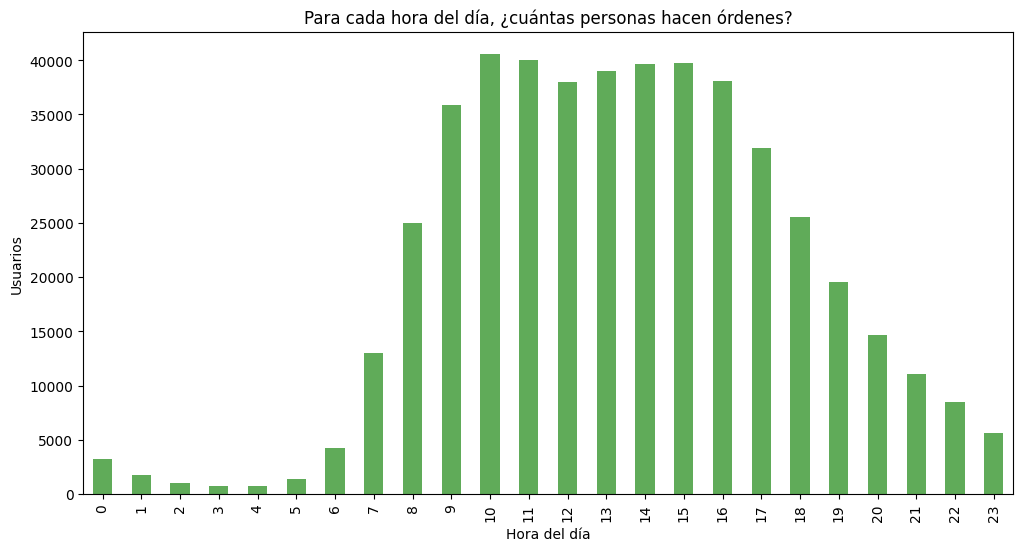

In [30]:
#definicion:'user_id': número de ID que identifica de manera única la cuenta de cada cliente.

# creo 'order_hours', agrupo por hora del dia la columna de user_id

order_hour = df_instacart_orders.groupby(by='order_hour_of_day')['user_id'].count()
order_hour.plot(kind='bar',
                title= "Para cada hora del día, ¿cuántas personas hacen órdenes?",
                figsize=(12,6),
                xlabel = "Hora del día",
                ylabel = "Usuarios",
                color = "#60ab59"
               )
plt.show()

Escribe aquí tus conclusiones

### [A3] ¿Qué día de la semana compran víveres las personas?

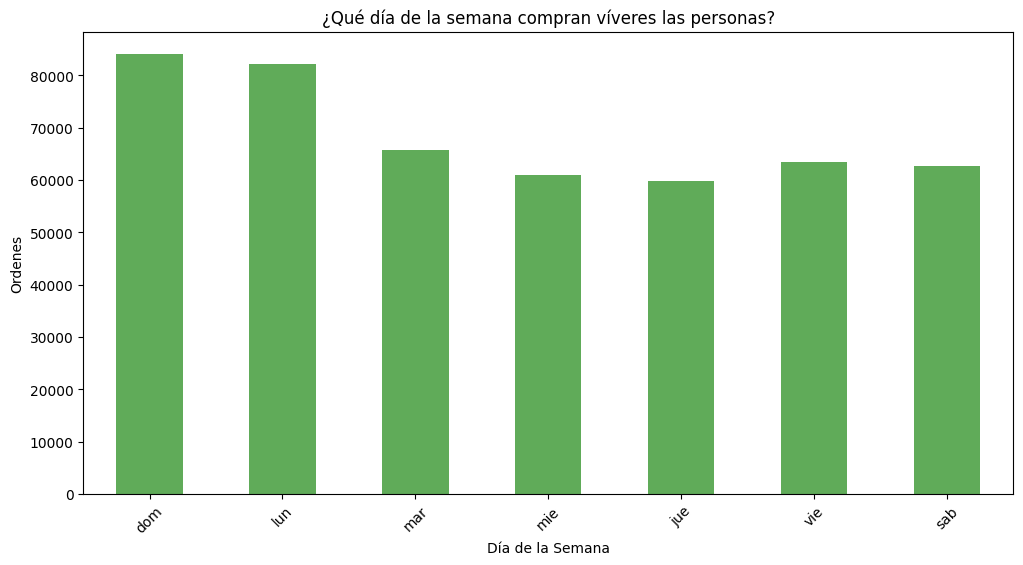

In [31]:
order_dow = df_instacart_orders.groupby(by='order_dow')['order_id'].count()      #Ordenes por día

#'order_dow': día de la semana en que se hizo el pedido (0 si es domingo).

x_axis = [0, 1, 2, 3, 4, 5, 6]                                         # valor diaa en numero
xlabels = ['dom', 'lun', 'mar', 'mie', 'jue', 'vie', 'sab']            # lista con dia en texto

# Crero un grafico de barras de ordenes por semana, y defino sus argumentos, tilulo, ejes..ect

order_dow.plot(kind='bar',
                title= "¿Qué día de la semana compran víveres las personas?",
                figsize=(12,6),
                xlabel = "Día de la Semana",
                ylabel = "Ordenes",
                color = "#60ab59",
                rot= 45
               )

plt.xticks(x_axis , xlabels)                  #Remplazo los valores de x por el nombre del día
plt.show()

Escribe aquí tus conclusiones

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

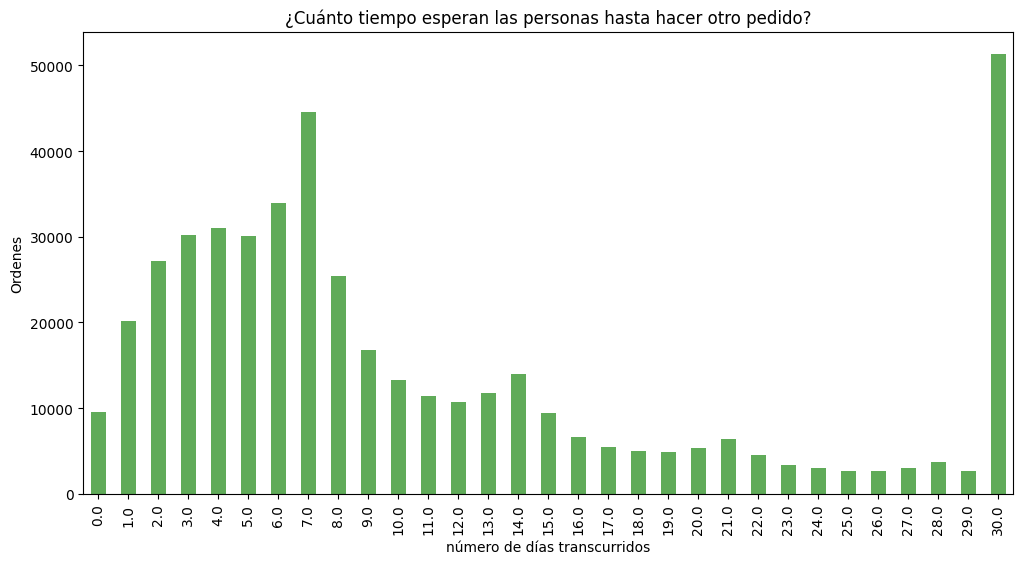

In [32]:
# Uso groupby() para contar las ordenes según los dias transcurridos

order_time = df_instacart_orders.groupby(by='days_since_prior_order')['order_id'].count()

# Crero una grafica de barras de ordenes según tiempo transcurridos, y defino sus argumentos:

order_time.plot(kind='bar',
                title= "¿Cuánto tiempo esperan las personas hasta hacer otro pedido?",
                figsize=(12,6),
                xlabel = "número de días transcurridos",
                ylabel = "Ordenes",
                color = "#60ab59",
               )
plt.show()

Escribe aquí tus conclusiones

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [33]:
wed_orders = df_instacart_orders[df_instacart_orders['order_dow']==3]  # Utilizo un filtro para obtener los valores de los miércoles
wed_bar = wed_orders.groupby(by='order_hour_of_day')['order_id'].count() # total ordenes por hora

sat_orders = df_instacart_orders[df_instacart_orders['order_dow']==6]  # Utilizo un filtro para obtener los valores de los sabados
sat_bar = sat_orders.groupby(by='order_hour_of_day')['order_id'].count() # total ordenes por hora

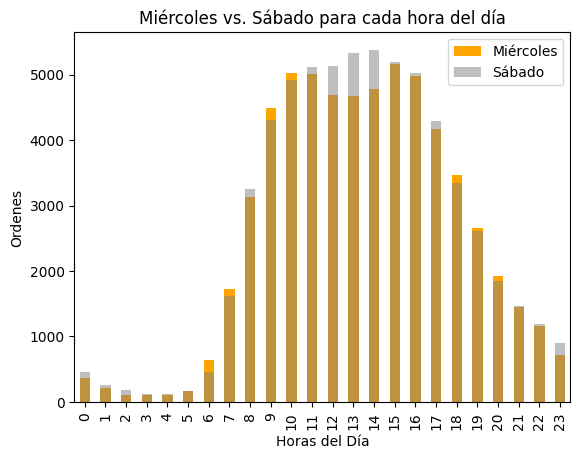

In [34]:
wed_bar.plot(kind='bar',                            # creo una gráfica de barras para miércoles
            color='orange',                          # defino parámetros deseados
            alpha = 1
        )


sat_bar.plot(kind='bar',                            # creo una gráfica de barras para sábado
                xlabel = "Horas del Día",           # defino parámetros deseados
                ylabel = "Ordenes",
                color='gray',
                alpha = 0.5
            )

plt.title("Miércoles vs. Sábado para cada hora del día")    # asigno un título a la grafica
plt.legend(["Miércoles", "Sábado"])   
plt.show()

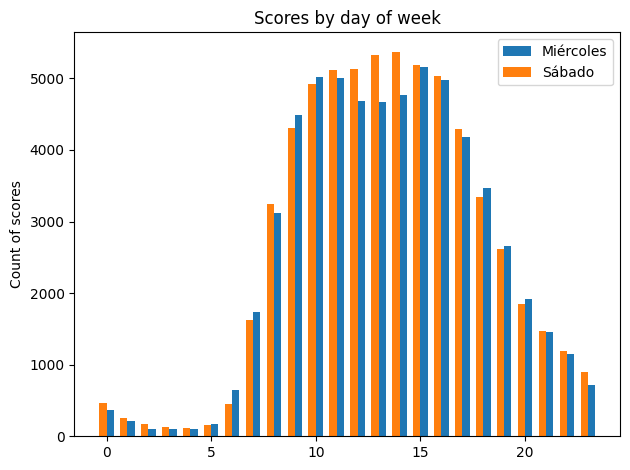

In [35]:
wed_orders = df_instacart_orders[df_instacart_orders['order_dow']==3]  # Utilizo un filtro para obtener los valores de los miércoles
wed_bar = wed_orders.groupby(by='order_hour_of_day')['order_id'].count() # total ordenes por hora

sat_orders = df_instacart_orders[df_instacart_orders['order_dow']==6]  # Utilizo un filtro para obtener los valores de los sabados
sat_bar = sat_orders.groupby(by='order_hour_of_day')['order_id'].count() # total ordenes por hora


ind = range(len(wed_bar))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(wed_bar.index+width/2, wed_bar.values, width=width, label='Wendsay')
rects2 = ax.bar(sat_bar.index-width/2, sat_bar.values, width=width, label='Saturday')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of scores')
ax.set_title('Scores by day of week')
plt.legend(["Miércoles", "Sábado"])

fig.tight_layout()

plt.show()

Escribe aquí tus conclusiones

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

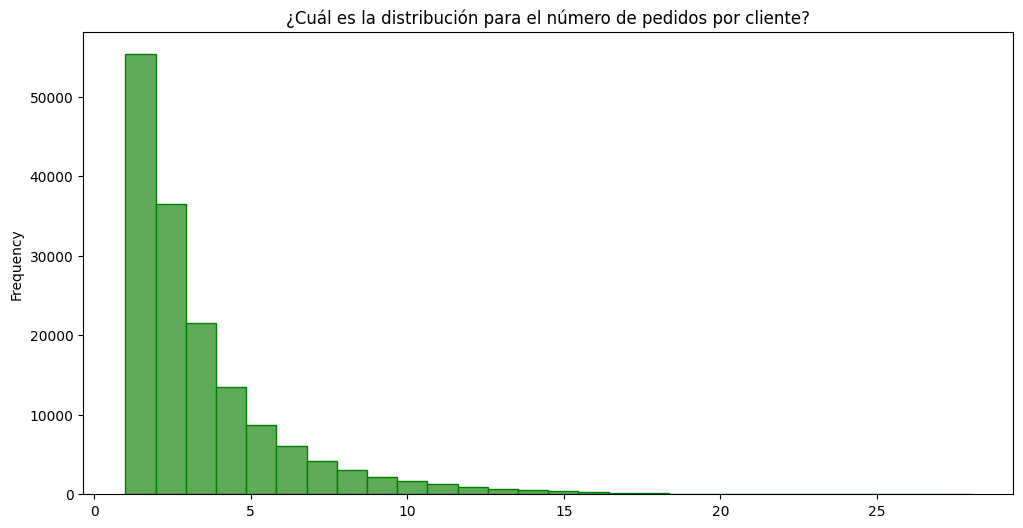

In [36]:
# creo order_per_client con el numero de pedidos por cliente, uso .value_counts()
order_per_client= df_instacart_orders['user_id'].value_counts()

# creo un histograma para order_per_client
order_per_client.plot(kind='hist',
                      bins = 28,
                      xlabel = "número de pedidos",
                      ylabel = "Ordenes",
                      title ='¿Cuál es la distribución para el número de pedidos por cliente?',
                      figsize=(12,6),
                      color = "#60ab59",
                      edgecolor='green'

            )
plt.show()

Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [37]:
# creo prod_id_and_name para unir las tablas de ordered products con products.
prod_id_and_name = df_order_products.merge(df_products, on = 'product_id') # uso merge con Prod_id.

# creo top_20 para almacenar las columnas que necesito.
top_20 = prod_id_and_name[['product_id','product_name','order_id']]

# agrupo por product_id y name las ordenes. luego uso count, sort_values, head(20) y reset_index.
top_20 = top_20.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending = False).head(20).reset_index()
top_20

,product_id,product_name,order_id
0,24852,Banana,66050
1,13176,Bag of Organic Bananas,53297
2,21137,Organic Strawberries,37039
3,21903,Organic Baby Spinach,33971
4,47209,Organic Hass Avocado,29773
5,47766,Organic Avocado,24689
6,47626,Large Lemon,21495
7,16797,Strawberries,20018
8,26209,Limes,19690
9,27845,Organic Whole Milk,19600


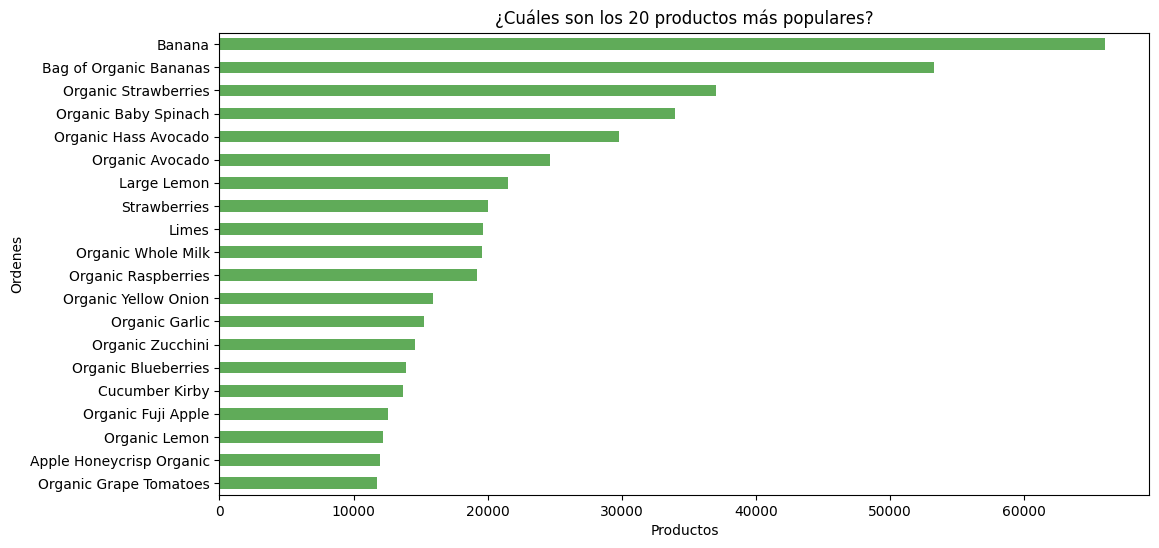

In [38]:
# creo top_20_bar sin el id de producto para la grafica.
top_20_bar = prod_id_and_name.groupby(['product_name'])['order_id'].count().sort_values(ascending = False).head(20)

# creo un grafico de barras para top_20_bar.
top_20_bar.plot(kind='barh',
            xlabel = "Productos",
            ylabel = "Ordenes",
            title ='¿Cuáles son los 20 productos más populares?',
            figsize=(12,6),
            color = "#60ab59"
           )

plt.gca().invert_yaxis()
plt.show()

Escribe aquí tus conclusiones

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [39]:
# creo top_5 para saber qué #de artículos se pide con mayor frecuencia.
Top_5 = df_order_products.groupby('order_id')['product_id'].count().sort_values().reset_index()

# uso count, sort_values y head para solo mostrar 5 #de artículos más repetidos.
Top_5 =Top_5.groupby('product_id')['order_id'].count().sort_values(ascending= False).head(5)

# creo un data frame para ver los datos mejor.

pd.DataFrame({'products_in_order':Top_5.index, 'total_orders':Top_5.values})

,products_in_order,total_orders
0,5,31923
1,6,31698
2,4,31054
3,7,30822
4,3,29046


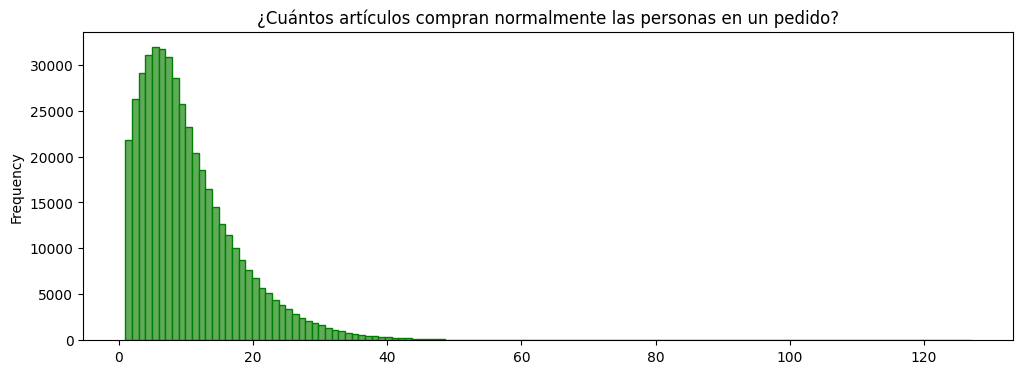

In [40]:
# creo prod_per_order, agrupo por order_id y cuento los valores en product_id.
prod_per_order = df_order_products.groupby('order_id')['product_id'].count()

# creo un histograma para artículos por pedido.
prod_per_order.plot(kind='hist',
                      bins = 127,
                      xlabel = "# número de productos por Orden",
                      ylabel = "Ordenes",
                      title ='¿Cuántos artículos compran normalmente las personas en un pedido?',
                      figsize=(12,4),
                      color = "#60ab59",
                      edgecolor='green'
                   )
plt.show()

In [41]:
print("Mode:", prod_per_order.mode())
prod_per_order.describe()

Mode: 0    5
Name: product_id, dtype: int64


count   450046.00
mean        10.10
std          7.54
min          1.00
25%          5.00
50%          8.00
75%         14.00
max        127.00
Name: product_id, dtype: float64

Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [42]:
#creo prod_per_reorder para guardar solo los pedidos que se vuelven a pedir.
#uso la tabla prod_id_and_name que cree con merge en pasos anteriores.

prod_per_reorder = prod_id_and_name[prod_id_and_name['reordered'] ==1]

#uso groupby en las columnas Id y Name, y cuento las orders_ID, ordeno con sort y uso head para 20 valores.
prod_per_reorder.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending = False).head(20)


product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: order_id, dtype: int64

Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [43]:
# uso la tabla que cree en pasos anteriores, agrupo por producto ID y uso mean() en la columna 'reordered'

prod_id_and_name.groupby(['product_id','product_name'])['reordered'].mean()

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                          0.56
2           All-Seasons Salt                                                    0.00
3           Robust Golden Unsweetened Oolong Tea                                0.74
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce   0.51
7           Pure Coconut Water With Orange                                      0.50
                                                                                ... 
49690       HIGH PERFORMANCE ENERGY DRINK                                       0.80
49691       ORIGINAL PANCAKE & WAFFLE MIX                                       0.43
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                     0.42
49693       SPRING WATER BODY WASH                                              0.44
49694       BURRITO- STEAK & CHEESE                                     

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [44]:
# creo orders merged para unir la tabla de df_order_products con df_orders, uso merge en 'order_id'.

order_merged = df_order_products.merge(df_instacart_orders, on = 'order_id')
order_merged.head(3)  # Muestro la nueva tabla.

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,58454,25,0,15,8.00
1,2141543,31869,15,1,58454,25,0,15,8.00
2,2141543,30233,9,1,58454,25,0,15,8.00


In [45]:
# en la nueva tabla uso groupby en 'user_id', y en la columna de 'reordered' uso el método mean()
reorder_percentage = order_merged.groupby(['user_id'])['reordered'].mean()  # sum de los que han reordenado y los divide sobre el total de productos comprados

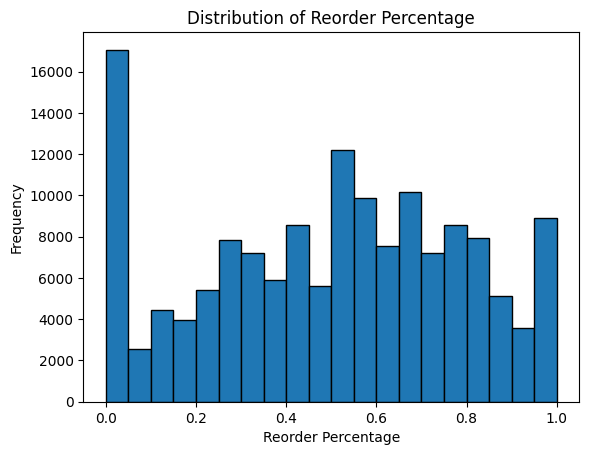

In [46]:
# Plot the distribution
plt.hist(reorder_percentage, bins=20, edgecolor='black')
plt.xlabel('Reorder Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Reorder Percentage')
plt.show()

Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [47]:
#creo first_20 para filtrar los productos donde 'add_to_cart_order' es 1 (primer artículo)

only_first = prod_id_and_name[prod_id_and_name['add_to_cart_order']==1]  # Solo el primero

top_20 = only_first.groupby("product_id").size().rename("count").nlargest(20)
first_20_table = df_products.join(top_20, how='right')
first_20_table

,product_id,product_name,aisle_id,department_id,count
product_id,,,,,
24852,24853,Shredded 3 Cheese Italian,21,16,15562
13176,13177,Warrior Blend Vanilla Dietary Supplement,65,11,11026
27845,27846,Calimyrna Figs,117,19,4363
21137,21138,Fat Free Low Sodium Poppyseed Dressing,89,13,3946
47209,47210,Fresh Farmed Tilapia Fillet,15,12,3390
21903,21904,Earth Paste Amazingly Natural Toothpaste Peppe...,20,11,3336
47766,47767,Essential Enzymes 500 Mg,70,11,3044
19660,19661,Slider Freezer Bags,85,17,2336
16797,16798,Chicken Breast Grilled Strips,7,12,2308


Escribe aquí tus conclusiones

### Conclusion general del proyecto: